In [2]:
import sympy as sp
from sympy import sin, cos, Function

t = sp.symbols('t')
x = Function('x')
f = cos(x(t))*sin(x(t))
df = sp.diff(f, t)
f

sin(x(t))*cos(x(t))

In [3]:
df

-sin(x(t))**2*Derivative(x(t), t) + cos(x(t))**2*Derivative(x(t), t)

In [6]:
#"____________________________________________________________________"#
from sympy import *
x, y, z = symbols('x y z', real=True)
integrand = sqrt(1 + ((x**3).diff(x))**2)   
integrand

sqrt(9*x**4 + 1)

In [7]:
antiderivative = integrand.integrate(x)
antiderivative

x*gamma(1/4)*hyper((-1/2, 1/4), (5/4,), 9*x**4*exp_polar(I*pi))/(4*gamma(5/4))

While that isn't the same form as the result from Wolfram Alpha it could easily be the same function (up to an additive constant). From this result or the one on Wolfram Alpha I very much doubt that you will find an analytic solution (using SymPy or anything else).

You can however find a numerical solution. Unfortunately there is a bug in SymPy's lambdify function that means nsolve doesn't work with this function:

In [10]:
#"____________________________________________________________________"#
from sympy import Tuple
from sympy.abc import t
x=Tuple(cos(t),sin(t),3*t)
ss = sum([i.diff(t)**2 for i in x])
integrate(sqrt(ss), (t,0,2))

2*sqrt(cos(2)**2 + sin(2)**2 + 9)

SymPy does not yet allow 3-D curves but you can do this in general by defining the point parametrically, then integrating over the range of interest.

In [11]:
#"____________________________________________________________________"#
l = Symbol('l')
arclength = Integral(sqrt(exp(2*l) + sin(exp(l))**2*cos(l)**2), l)
arclength

Integral(sqrt(exp(2*l) + sin(exp(l))**2*cos(l)**2), l)

In [12]:
arclength = Integral(sqrt(exp(2*l) + sin(exp(l))**2*cos(l)**2), (l, 0, 1))
arclength

Integral(sqrt(exp(2*l) + sin(exp(l))**2*cos(l)**2), (l, 0, 1))

In [13]:
arclength.n()

1.91141826800283

In [14]:
#"____________________________________________________________________"#
""""a function with a double integral. The inner integral 
has boundaries 20 and x-2, while the outer has boundaries 22 and 30.
from sympy import *"""

x, y = symbols("x y")
f = (x ** 2 + y ** 2)
res = integrate(f, (y, 20, x-2), (x, 22, 30))
res

40576

In [15]:
example_poly = x/2-y**2
example_poly

x/2 - y**2

In [17]:
integrate(example_poly, (x, -1, 1), (y, -1, 1))

-4/3

In [18]:
import sympy as sp
from sympy.abc import x,y

V = sp.Matrix(4,1,[1,x,y,x*y])
V

Matrix([
[  1],
[  x],
[  y],
[x*y]])

In [19]:
I = V.integrate((x,0,1),(y,0,1))
I

Matrix([
[  1],
[1/2],
[1/2],
[1/4]])

In [24]:
""""**************************************************************
*******************************************
************************"""
i,n,base=symbols('i n base')
f=Function('f')
P = Product(E**f(i), (i, 1, n))  
P

Product(exp(f(i)), (i, 1, n))

In [23]:
P.rewrite(Sum) 

exp(Sum(log(exp(f(i))), (i, 1, n)))

You can use rewrite to convert between Products and Sums using exp and log:

In [28]:
""""**************************************************************
*******************************************
************************"""
from sympy import *

from sympy.abc import x, y

a, b = Function('a'), Function('b')

Integral(a(x)*b(y), y, x)

In [29]:
Integral(a(x)*b(y), y, x).doit()

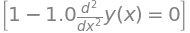

In [32]:
from sympy import *

x = Symbol('x')
y = Function('y')(x)

# define Lagrangian
L = 0.5*(Derivative(y,x))**2 + y*Derivative(y,x) + Derivative(y,x) + y

# Euler-Lagrange equation
euler_equations(L,y,x)

## ___________________________

In [34]:
from sympy import *
from sympy.abc import  omega, t
a = symbols('a', positive=True)
f = E**(-I * omega * t)   
f

In [35]:
integrate(f, (omega, -a, a))

⎧     ⅈ⋅a⋅t      -ⅈ⋅a⋅t                            
⎪  ⅈ⋅ℯ        ⅈ⋅ℯ                                  
⎪- ──────── + ─────────  for t > -∞ ∧ t < ∞ ∧ t ≠ 0
⎨     t           t                                
⎪                                                  
⎪         2⋅a                    otherwise         
⎩                                                  

Sympy does not know about all the things you assume about your variables, so you need to tell sympy explicitly. For example a is supposed to be a positive (and hence real) number. If I tell this to sympy, then I get a nice answer. Try

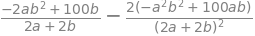

In [36]:
import sympy as sp
sp.init_printing()

a,b,c = sp.symbols("a b c")

N=a*b*100 - (a**2) * (b**2)
D=2*(a+b)
V = N / D
V.diff(a)

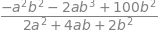

In [37]:
V.diff(a).cancel()

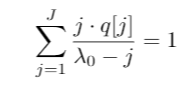

In [38]:
from sympy.solvers import solve
from sympy import symbols, summation, Array

p = Array([0.2, 0.3, 0.3, 0.1, 0.1])
l, j = symbols('l j')
eq = summation(j * (1 - p[j]) / (l - j), (j, 0, 4))
eq

In [40]:
s = solve(eq - 1, l) 
s

List p needs to be converted into symbolic array before it can be indexed with symbolic value j.
(assuming your p stands for 1 - q)
p = 1-q in the above, hence q[j] should have been replaced by (1-p[j]).

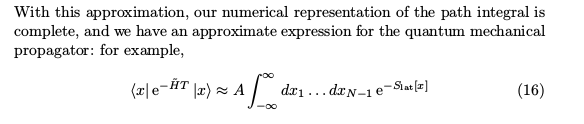

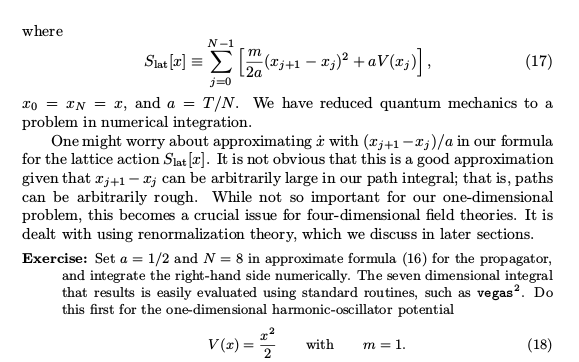

In [41]:
import sympy
from sympy import IndexedBase, Idx, oo, symbols
a, m = symbols('a m', positive=True)
N = 2

def V(sym_a, sym_x):
    return (sym_x**2)/sym_a

j, j_primed = symbols('j, j_primed', integer=True)
x = symbols('x0:{}'.format(N))
S = sympy.Add(*[((m/(2*a)) * (x[j_idx+1] - x[j_idx])**2 + a*V(a, x[j_idx])) for j_idx in range(N-1)])
S

In [42]:
integrand = sympy.exp(-S)
integrated_path = sympy.integrate(integrand, *[(x[j_primed_idx], -oo, oo) for j_primed_idx in range(N)], conds='none')
integrated_path

                          ⎛⎧                                 2            ⎞ 
                          ⎜⎪           ⅈ                  4⋅a  + 2⋅a⋅m    ⎟ 
                          ⎜⎪────────────────────────  for ──────────── > 2⎟ 
                          ⎜⎪     ___________________          a⋅m         ⎟ 
                          ⎜⎪    ╱         2                               ⎟ 
                          ⎜⎪   ╱       4⋅a  + 2⋅a⋅m                       ⎟ 
           ______________ ⎜⎪  ╱   -1 + ────────────                       ⎟ 
          ╱    2          ⎜⎪╲╱            2⋅a⋅m                           ⎟ 
-ⅈ⋅π⋅√a⋅╲╱  4⋅a  + 2⋅a⋅m ⋅⎜⎨                                              ⎟ 
                          ⎜⎪           1                                  ⎟ 
                          ⎜⎪───────────────────────        otherwise      ⎟ 
                          ⎜⎪     __________________                       ⎟ 
                          ⎜⎪    ╱        2                                ⎟ 

In [43]:
subbed_path = integrated_path.subs({a: sympy.Rational(1, 2), m: 1})
subbed_path

SymPy's handling of indexed objects is not nearly sophisticated enough to handle this computation as a human would. In particular, it is not going to understand integration over (x[j_primed_idx], -oo, oo) as "integrate over all indexed x". This looks like a single integration to SymPy, and over a variable that's distinct from any x[j] because the indices don't look the same. In short, SymPy doesn't really understand how indices work in mathematics.

You'll need to declare the value of N upfront to get anything done. And to fix the typo in (x[j_idx+1] - x[j_idx]**2) — this should be (x[j_idx+1] - x[j_idx])**2. And it's still going to take forever if N is large and a and m are symbolic. The issue is that there are cases upon cases based on the relative sizes of a and m. Here is a working version with N, a, m all specified upfront — this helps the integrator a lot. Note the use of Rational(1, 2) instead of a float 0.5 by the way — this matters for SymPy.

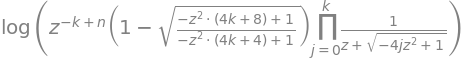

In [44]:
import sympy as sp
from IPython.display import display
sp.init_printing() # display math as latex
z = sp.Symbol('z')
j,k,n = sp.symbols('j,k,n')
Prod = sp.Product( (z + sp.sqrt(1-4*j*z**2))**(-1), (j,0,k))
expr = sp.log(z**(n-k) * (1 - sp.sqrt((1 - 4*(k+2)*z**2)/(1-4*(k+1)*z**2)) ) * Prod)
expr

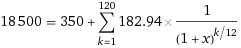

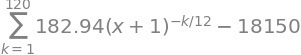

In [46]:
from sympy.abc import k, x
eq = 350 - 18500 + Sum(182.94 * (1/(1+x)**(k/12)), (k, 1, 120))
eq

In [47]:
nsolve(eq, 0)

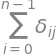

In [48]:
from sympy import *
from sympy.concrete.delta import _simplify_delta

n = symbols("n")
j = tensor.Idx("j")
i = tensor.Idx("i")

s = Sum(KroneckerDelta(i, j), (i, 0, n - 1))
s

In [49]:
s.doit()

⎧1  for j ≥ 0 ∧ j ≤ n - 1
⎨                        
⎩0        otherwise      

In [50]:
summation(KroneckerDelta(i, j), (i, 0, n - 1))

⎧1  for j ≥ 0 ∧ j ≤ n - 1
⎨                        
⎩0        otherwise      

In [51]:
s.doit().subs({j >= 0: True, j <= n-1: True})

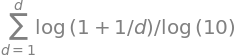

In [53]:
d = Symbol('d')
CDF = Sum(log(1 + 1/d)/log(10), (d, 1, d))
CDF

In [54]:
CDF.subs(d, 5).doit() 

In [55]:
 log(exp(CDF).expand().doit()).simplify() 

## ------------------------------------------------ ##

In [56]:
r = RootOf(x**25-96*x**12-4*x**3+2, 0)
r

In [57]:
r.evalf()

In [58]:
Poly(x**25-96*x**12-4*x**3+2, x).nroots()

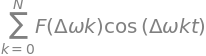

In [61]:
from sympy import *
F = Function('F')
domega = symbols('\Delta\omega', real = True , positive=True,nonzero=True)
omega = symbols('omega', real = True , positive=True,nonzero=True)
T = symbols('T', real = True , positive=True,nonzero=True)
N = symbols('N', integer = True, positive=True ,nonzero=True)
k = symbols('k', integer = True ,positive=True )
t = symbols('t', real = True, positive=True)

T = 2 * pi / N / domega

SF =  Sum(F(domega*k) * cos(t*domega*k),(k,0,N) )
SF

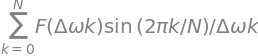

In [60]:
integrate(SF,(t,0,T))     

In [62]:
from sympy import var, Eq, solve

var('C, r, n, fv, P', positive = True)

# this throws an error: no algorithms are implemented to solve equation
equation = Eq(P, C * ((1-1/(1+r)**n))/r + fv/(1+r)**n)

# a simple calculation for power works fine
equation = Eq(P, (1+r)**n)
solve(equation, r)

In [63]:
import sympy
from sympy import symbols

P, C, r, n, fv = sympy.symbols('P C r n fv')
eq = sympy.Eq(P, C * ((1-1/(1+r)**n))/r + fv/(1+r)**n)

In [64]:
eq

In [68]:
#We can rearrange this into a polynomial

In [65]:
 eq2 = Eq(eq.lhs * (1+r)**n * r, eq.rhs * (1+r)**n * r).expand()  

In [67]:
 eq2  

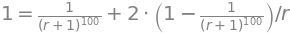

In [70]:
eq3 = eq.subs({P:1, C:2, fv:1, n:100}) 
eq3

In [71]:
nsolve(eq3, r, 1) 

Now we see that this is a polynomial except that the exponent n is symbolic. In general this kind of equation will not have a solution expressible in closed form - that is why sympy has no algorithms for this particular case (it is not a limitation of sympy itself).

It is possible to solve this equation numerically but numerical solution only works if we have numerical values for each of the parameters. If we substitute numbers for the parameters then nsolve can find the solution numerically: